In [1]:
from utilidades import *
import warnings
warnings.filterwarnings('ignore')

# Mean Shift

O algoritmo de clusterização Mean Shift é uma técnica de aprendizado não supervisionado que agrupa os dados em clusters com base na densidade dos pontos. Ao contrário do K-means, o Mean Shift não requer a especificação prévia do número de clusters K. Ele pode identificar automaticamente o número de clusters com base nas características dos dados.

A ideia principal por trás do algoritmo Mean Shift é deslocar iterativamente os pontos em direção a regiões mais densas do espaço de características até que eles se estabilizem em regiões de alta densidade, que correspondem aos centros dos clusters.

Descrição passo a passo de como o algoritmo Mean Shift funciona:

**1. Escolha dos centros iniciais**: O algoritmo começa selecionando aleatoriamente ou através de alguma estratégia de inicialização os pontos iniciais que atuarão como centros dos clusters.

**2. Cálculo das direções e distâncias**: Para cada ponto central escolhido no passo anterior, o algoritmo calcula as direções e as distâncias em relação a outros pontos do conjunto de dados. Isso é feito com base em uma função de kernel que avalia a proximidade dos pontos. A função mais comumente utilizada é a “flat” que atribui o mesmo peso a todos os pontos dentro de uma determinada distância do centro. Essa distância é definida como o raio do kernel. Todos os pontos dentro do raio do kernel têm a mesma importância na estimativa da densidade ao redor do centro.

**3. Deslocamento para regiões de alta densidade**: Os pontos são deslocados iterativamente em direção às regiões de maior densidade (onde a concentração de pontos é maior). Esse deslocamento é realizado calculando-se o vetor médio das direções e distâncias obtidas no passo anterior. Esse vetor representa o novo deslocamento para cada ponto central.

**4. Convergência**: O algoritmo repete o passo 2 e 3 até que os pontos se estabilizem em regiões de alta densidade, ou seja, até que os pontos centralizados não se movam mais significativamente.
Atribuição aos clusters: Uma vez que os pontos centralizados se estabilizam, o algoritmo atribui cada ponto do conjunto de dados ao cluster cujo ponto central está mais próximo.

Sendo assim, o algoritmo Mean Shift é eficaz na identificação de clusters com formas não-lineares e complexas, o que pode ser difícil para métodos como o K-Means. Porém o desempenho do Mean Shift pode depender da escolha adequada do bandwidth, que pode ser um parâmetro sensível. Também, em alguns casos, o Mean Shift pode convergir para centros locais, resultando em uma solução subótima.


# Data

In [2]:
X_iris, y_iris, iris_target_names = get_iris_data()
X_wine, y_wine, wine_target_names = get_wine_data()
X_syn_ctrl, y_syn_ctrl, syn_ctrl_target_names = get_synthetic_control_data()

# Normalizando os dados
from scipy.stats import zscore
X_syn_ctrl = zscore(X_syn_ctrl)
X_iris = zscore(X_iris)
X_wine = zscore(X_wine)

<h1>Redução de dimensionalidade</h1>

In [3]:
from sklearn.manifold import TSNE

X_syn_ctrl_2d = TSNE().fit_transform(X_syn_ctrl)
X_wine_2d = TSNE().fit_transform(X_wine)
X_iris_2d = TSNE().fit_transform(X_iris)

# Clusterização

In [4]:
from sklearn.cluster import MeanShift

ms_labels_syn_ctrl = MeanShift(bandwidth=6.7).fit_predict(X_syn_ctrl) #bandwidth=6.7
ms_labels_iris = MeanShift(bandwidth=0.9).fit_predict(X_iris) # bandwidth=0.9
ms_labels_wine = MeanShift(bandwidth=2.8).fit_predict(X_wine) # bandwidth=2.8

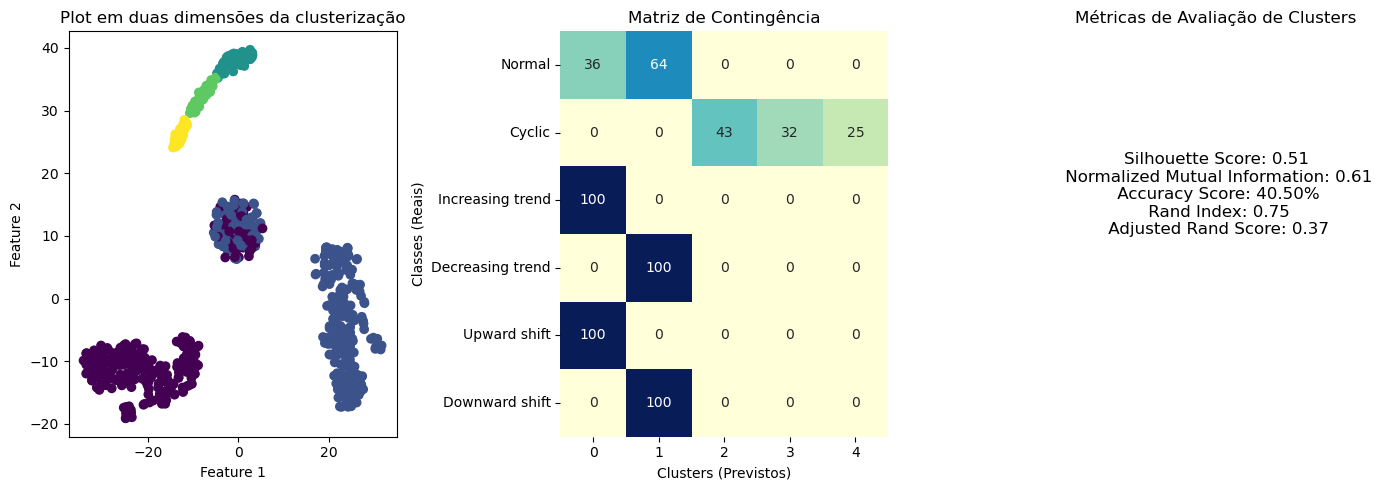

In [5]:
# Synthetic Control

plot_cluster_evaluation(X_syn_ctrl_2d, y_syn_ctrl, ms_labels_syn_ctrl, syn_ctrl_target_names)

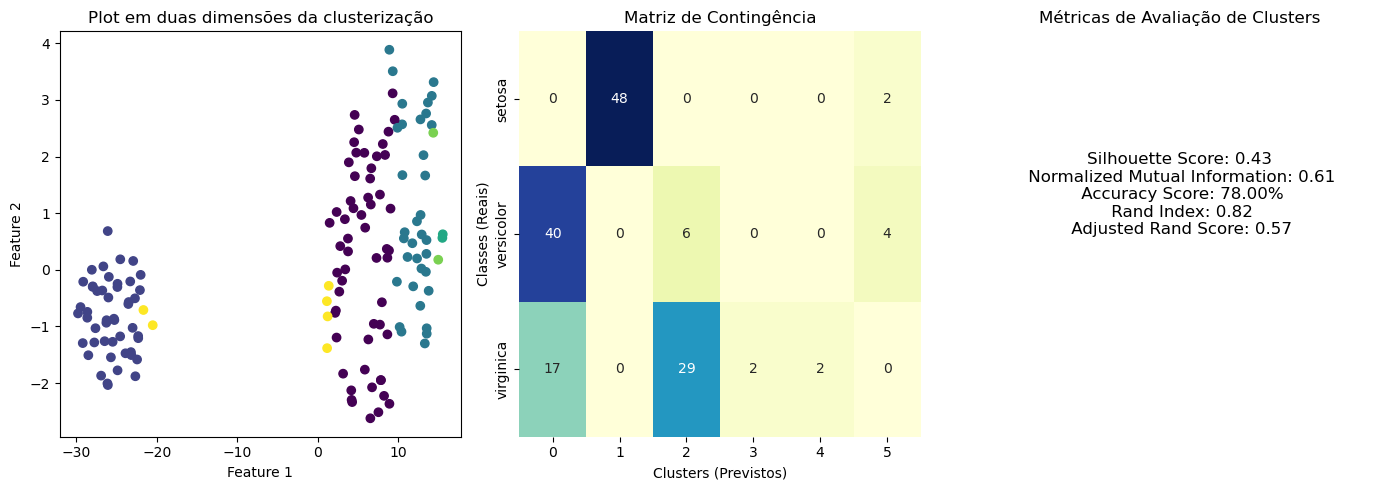

In [6]:
# Iris

plot_cluster_evaluation(X_iris_2d, y_iris, ms_labels_iris, iris_target_names)

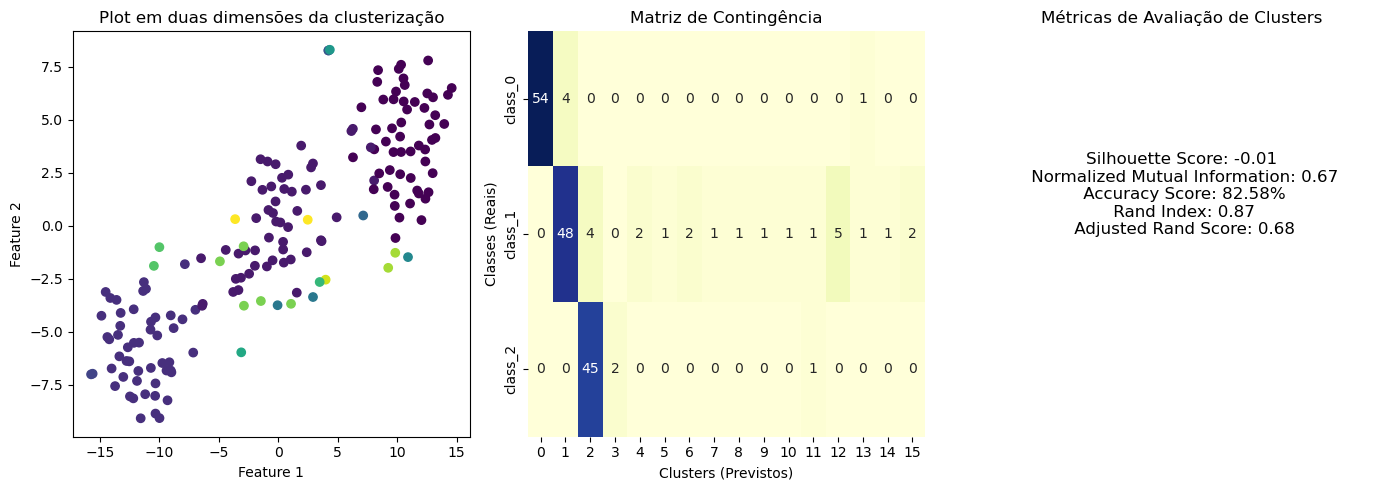

In [7]:
# Wine

plot_cluster_evaluation(X_wine_2d, y_wine, ms_labels_wine, wine_target_names)

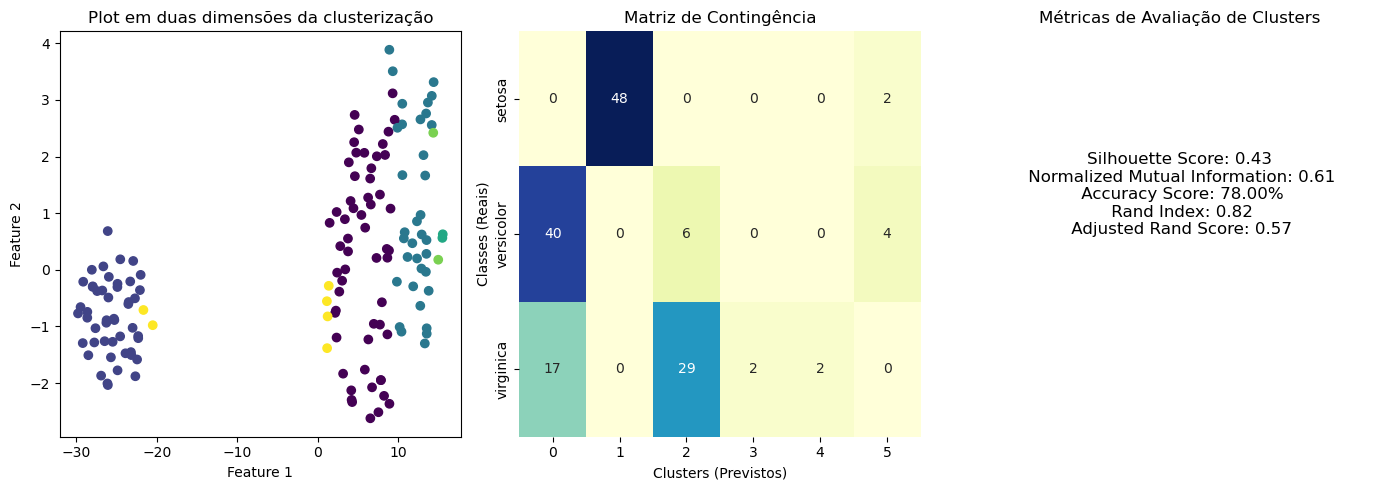

In [8]:
plot_cluster_evaluation(X_iris_2d, y_iris, ms_labels_iris, iris_target_names)